# Import

In [67]:
import numpy as np
import pandas as pd 
import matplotlib as plt

In [68]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [71]:
df = pd.read_csv('Data/results_with_users_V2.csv')

In [72]:
columns = ['flow', 'selfEntropyT', 'selfEntropyS','author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source', 'FF_Ratio_source',
       'FF_ratio2_source', 'TweetsNb_source_users', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'FF_Ratio_target', 'FF_ratio2_target',
       'TweetsNb_source_target']

In [74]:
len(df)

64262

In [75]:
df_filtered = df

In [76]:
lst = [1385205739640131584,1234489772183343104,408382525,230190058,1143396858208800768,3240197969,
       188251389,904540565307617280,988869330,125922216,1382981076251971584,965548724247191552,1408890653887586306,
      1347927540988571649,1373262453161799686,781471603662196736,1455248470776877064,1355566985845694468,
      1057622011395084289,1262806249164255232,410377944,28803148,1436903038069903364,1410288349076721675,
      1413540569444356101,1405131947790290947,4727914933,1247885277374251009,1192824698024927233,
      38448943,1299632796844077057,1112983458433781761,2892043241,1174914666587250688,986040298462728193,38152701]

In [77]:
len(lst)

36

In [78]:
df_filtered = df_filtered[~df_filtered['target'].isin(lst)]

In [79]:
df_filtered = df_filtered[~df_filtered['source'].isin(lst)]

In [80]:
len(df_filtered)

48620

In [81]:
df_filtered.columns

Index(['Unnamed: 0', 'source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'Key', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source_users',
       'username_target', 'author_followers_target', 'author_tweets_target',
       'author_following_target', 'author_listed_target',
       'author_description_target', 'author_location_target',
       'author_private_target', 'author_verified_target',
       'author_account_creation_target', 'Year_creation_target',
       'FF_ratio2_target', 'FF_Ratio_target', 'TweetsNb_source_target'],
      dtype='object')

In [145]:
df[(df['target']==832804308156420096) & (df['source']==1403008149020459013) ]

,Unnamed: 0,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,Key,username_source,...,author_listed_target,author_description_target,author_location_target,author_private_target,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target
38493,38493,1403008149020459013,832804308156420096,0.971519,5.129283,0.284509,4.986803,4.986803,832804308156420096 - 1403008149020459013,AglowStockNews,...,2,I'm a Play to Earn Games and Metaverse Researc...,"New York, NY",False,False,2017-02-18 04:09:54+00:00,2017,0.38191,0.617886,3


In [82]:
# on est passé de 64262 à 48620

In [83]:
len(df)

64262

In [84]:
len(df_filtered)

48620

In [85]:
df.flow.quantile(0.95)

6.388094863304299

In [42]:
df[df['flow']<6.388094863304299]

,Unnamed: 0,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,Key,username_source,...,author_listed_target,author_description_target,author_location_target,author_private_target,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target
0,0,1252722861002813440,1278448045974261763,0.354528,5.018599,5.727837,5.258726,4.376186,1252722861002813440 - 1278448045974261763,SmartCryptoNew1,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
1,1,441047175,1278448045974261763,0.216983,6.162391,5.034185,5.258726,3.624782,441047175 - 1278448045974261763,crypt_planet,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
2,2,1409852115892199428,1278448045974261763,0.593484,5.636173,5.625478,5.258726,3.378140,1278448045974261763 - 1409852115892199428,HyperLede,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
3,3,928953443921813505,1278448045974261763,0.236568,4.464249,5.203877,5.258726,4.794035,928953443921813505 - 1278448045974261763,wealthmonks,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
4,4,997581688749379587,1278448045974261763,0.226585,4.797519,5.335420,5.258726,4.684788,997581688749379587 - 1278448045974261763,LosKruptos,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64257,64257,1375539549460439040,1252722861002813440,-0.012234,4.987894,5.433272,4.376186,4.818667,1252722861002813440 - 1375539549460439040,tell_crypto,...,395,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4
64258,64258,1347815153828569088,1252722861002813440,-0.233319,6.197666,5.911740,4.376186,4.997640,1252722861002813440 - 1347815153828569088,moni_talks_xyz,...,395,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4
64259,64259,38448943,1252722861002813440,1.943950,8.406770,5.840360,4.376186,1.511098,38448943 - 1252722861002813440,Sil3ntVip3r,...,395,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4
64260,64260,1347927540988571649,1252722861002813440,-0.140736,11.140437,5.046929,4.376186,2.098551,1252722861002813440 - 1347927540988571649,Bitcoin8News,...,395,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4


In [86]:
# Visualizations

In [91]:
import seaborn as sns
import matplotlib as plt

In [ ]:
author_followers_source_range author_followers_target_range

In [180]:
mean_values = df_filtered.groupby(["author_followers_source_range", "author_followers_target_range"])["flow"].mean().reset_index()

In [181]:
mean_values = df_filtered.groupby(["author_followers_source_range", "author_followers_target_range"])["flow"].mean().reset_index()

In [176]:
# Define the bin edges
bins = [1, 10, 100, 1000, 10000, 100000]

# Use the cut function to create the categories for both columns
df_filtered['author_followers_source_range'] = pd.cut(df_filtered['author_followers_source'], bins)
df_filtered['author_followers_target_range'] = pd.cut(df_filtered['author_followers_target'], bins)

# Display the updated DataFrame
df_filtered

,Unnamed: 0,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,Key,username_source,...,author_location_target,author_private_target,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target,author_followers_source_range,author_followers_target_range
0,0,1252722861002813440,1278448045974261763,-0.354528,5.018599,5.727837,5.258726,4.376186,1252722861002813440 - 1278448045974261763,SmartCryptoNew1,...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3,"(10000.0, 100000.0]","(10, 100]"
1,1,441047175,1278448045974261763,-0.216983,6.162391,5.034185,5.258726,3.624782,441047175 - 1278448045974261763,crypt_planet,...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3,"(1000.0, 10000.0]","(10, 100]"
2,2,1409852115892199428,1278448045974261763,-0.593484,5.636173,5.625478,5.258726,3.378140,1278448045974261763 - 1409852115892199428,HyperLede,...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3,"(10.0, 100.0]","(10, 100]"
3,3,928953443921813505,1278448045974261763,-0.236568,4.464249,5.203877,5.258726,4.794035,928953443921813505 - 1278448045974261763,wealthmonks,...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3,"(100.0, 1000.0]","(10, 100]"
4,4,997581688749379587,1278448045974261763,-0.226585,4.797519,5.335420,5.258726,4.684788,997581688749379587 - 1278448045974261763,LosKruptos,...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3,"(100.0, 1000.0]","(10, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64255,64255,1250830691824283648,1252722861002813440,0.499882,6.296803,5.113667,4.376186,5.445884,1250830691824283648 - 1252722861002813440,StockMKTNewz,...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4,NaN,"(10000, 100000]"
64256,64256,361362830,1252722861002813440,-1.430969,5.937568,6.209453,4.376186,2.227399,361362830 - 1252722861002813440,DomainAddress4u,...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4,"(1000.0, 10000.0]","(10000, 100000]"
64257,64257,1375539549460439040,1252722861002813440,0.012234,4.987894,5.433272,4.376186,4.818667,1252722861002813440 - 1375539549460439040,tell_crypto,...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4,"(10.0, 100.0]","(10000, 100000]"
64258,64258,1347815153828569088,1252722861002813440,0.233319,6.197666,5.911740,4.376186,4.997640,1252722861002813440 - 1347815153828569088,moni_talks_xyz,...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4,"(1000.0, 10000.0]","(10000, 100000]"


In [184]:
mean_values

author_followers_target_range,"(1, 10]","(10, 100]","(100, 1000]","(1000, 10000]","(10000, 100000]"
author_followers_source_range,,,,,
"(1, 10]",0.000000,-8.125838e-01,-1.003778e+00,-8.775863e-01,-1.090014e+00
"(10, 100]",0.812584,-3.007993e-18,-1.472564e-01,-4.413023e-02,-1.828847e-01
"(100, 1000]",1.003778,1.472564e-01,9.194394e-19,1.151027e-01,-2.100113e-02
"(1000, 10000]",0.877586,4.413023e-02,-1.151027e-01,-1.027984e-19,-1.491980e-01
"(10000, 100000]",1.090014,1.828847e-01,2.100113e-02,1.491980e-01,9.489086e-19


In [183]:
mean_values = mean_values.pivot(index="author_followers_source_range", columns="author_followers_target_range", values="flow")

In [186]:
mean_values[mean_values>0].dropna()

author_followers_target_range,"(1, 10]","(10, 100]","(100, 1000]","(1000, 10000]","(10000, 100000]"
author_followers_source_range,,,,,
"(10000, 100000]",1.090014,0.182885,0.021001,0.149198,9.489086e-19


In [ ]:
import seaborn as sns

# Assume that "data" is a DataFrame with the values to be plotted

# Create the heat map
ax = sns.heatmap(data)

# Set the x-axis and y-axis scales to logarithmic
ax.set_xscale("log")
ax.set_yscale("log")

# Show plot
plt.show()

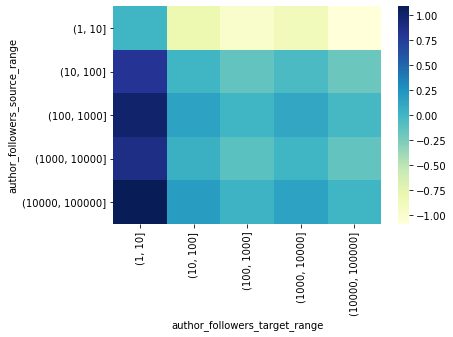

In [187]:
ax = sns.heatmap(mean_values, cmap="YlGnBu")

plt.show()

In [93]:
# only positive flow

In [189]:
mean_values_pos = df_filtered[df_filtered['flow']>0].groupby(["author_followers_source_range", "author_followers_target_range"])["flow"].mean().reset_index()
mean_values_pos = mean_values_pos.pivot(index="author_followers_source_range", columns="author_followers_target_range", values="flow")

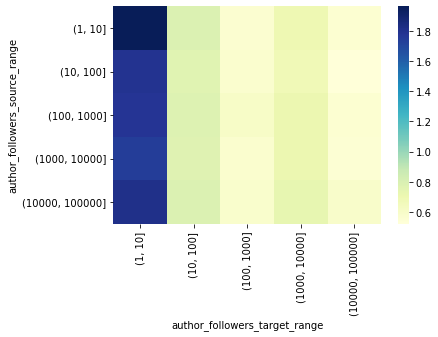

In [190]:
ax = sns.heatmap(mean_values_pos, cmap="YlGnBu")
#ax = sns.heatmap(mean_values, cmap="YlGnBu")

plt.show()

In [106]:
#neg flow

In [196]:
df[df['flow']>0]

,Unnamed: 0,source,target,flow,entropyStoT,entropyTtoS,selfEntropyT,selfEntropyS,Key,username_source,...,author_listed_target,author_description_target,author_location_target,author_private_target,author_verified_target,author_account_creation_target,Year_creation_target,FF_ratio2_target,FF_Ratio_target,TweetsNb_source_target
22,22,1451528837293088769,1278448045974261763,0.146512,5.582078,4.539866,5.258726,4.961728,1278448045974261763 - 1451528837293088769,InvestraSector,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
26,26,1027121072,1278448045974261763,0.162888,5.688506,5.203877,5.258726,5.663535,1027121072 - 1278448045974261763,StockMarketPete,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
28,28,1355424061027876867,1278448045974261763,0.006496,4.789327,4.729184,5.258726,5.229991,1278448045974261763 - 1355424061027876867,stockexamen,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
29,29,1390842784261853186,1278448045974261763,0.214529,6.331338,4.993406,5.258726,5.046704,1278448045974261763 - 1390842784261853186,TXMCtrades,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
31,31,1368983844137877509,1278448045974261763,0.077601,5.558653,5.640417,5.258726,5.758859,1278448045974261763 - 1368983844137877509,factiive,...,0,Crypto News / Opinions / Stories\n🚀📈⚡\n\n#Cryp...,NaN,False,False,2020-07-01 21:59:12+00:00,2020,0.482353,0.931818,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64255,64255,1250830691824283648,1252722861002813440,0.499882,6.296803,5.113667,4.376186,5.445884,1250830691824283648 - 1252722861002813440,StockMKTNewz,...,395,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4
64257,64257,1375539549460439040,1252722861002813440,0.012234,4.987894,5.433272,4.376186,4.818667,1252722861002813440 - 1375539549460439040,tell_crypto,...,395,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4
64258,64258,1347815153828569088,1252722861002813440,0.233319,6.197666,5.911740,4.376186,4.997640,1252722861002813440 - 1347815153828569088,moni_talks_xyz,...,395,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4
64260,64260,1347927540988571649,1252722861002813440,0.140736,11.140437,5.046929,4.376186,2.098551,1252722861002813440 - 1347927540988571649,Bitcoin8News,...,395,#SCN1 cover key news updates from quality #cry...,NaN,False,False,2020-04-21 22:16:41+00:00,2020,0.986138,71.137395,4


In [193]:
mean_values_neg = df_filtered[df_filtered['flow']<0].groupby(["author_followers_source_range", "author_followers_target_range"])["flow"].mean().reset_index()
mean_values_neg = mean_values_neg.pivot(index="author_followers_source_range", columns="author_followers_target_range", values="flow")

<AxesSubplot:xlabel='author_followers_target_range', ylabel='author_followers_source_range'>

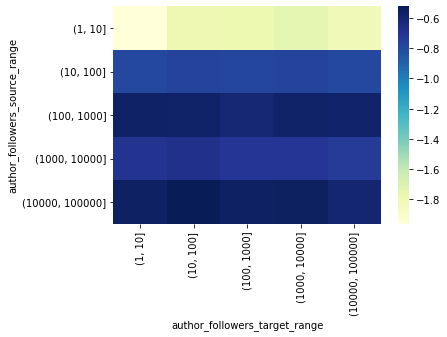

In [194]:
sns.heatmap(mean_values_neg, cmap="YlGnBu")

In [110]:
# on filtered data only

In [111]:
baseline_mse = [0.21497 , 0.11896351257353363]
normalized_mse = [0.00556, 0.015646189236780718]
standardized_mse = [0.23243, 0.11453934540841763]

TypeError: can only concatenate str (not "float") to str

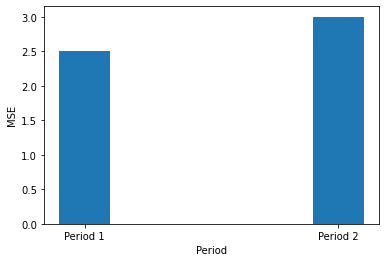

In [112]:
import matplotlib.pyplot as plt

# Create three lists containing the MSE values for each period
baseline_mse = [2.5, 3.0]
normalized_mse = [1.5, 2.0]
standardized_mse = [1.0, 1.5]

# Set the x-axis labels and the bar width
x_labels = ["Period 1", "Period 2"]
bar_width = 0.2

# Set the x-axis and y-axis labels
plt.xlabel("Period")
plt.ylabel("MSE")

# Plot the MSE values for each period and data set
plt.bar(x_labels, baseline_mse, width=bar_width, label="Baseline")
plt.bar([x + bar_width for x in x_labels], normalized_mse, width=bar_width, label="Normalized")
plt.bar([x + 2*bar_width for x in x_labels], standardized_mse, width=bar_width, label="Standardized")

# Add a legend to the chart
plt.legend()

# Show the chart
plt.show()

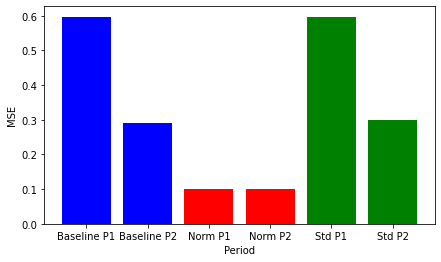

In [19]:
import matplotlib.pyplot as plt

# Create a list containing the MSE values for each period
mse = [0.597 , 0.29,0.1, 0.1,0.597, 0.3]

# Create a list of x-axis labels
x_labels = ["Baseline P1", "Baseline P2","Norm P1", "Norm P2","Std P1", "Std P2"]

plt.figure(figsize=(7, 4))

# Set the x-axis and y-axis labels
plt.xlabel("Period")
plt.ylabel("MSE")

# Plot the MSE values
plt.bar(x_labels, mse,color=['b','b','r', 'r','g','g'])


# Show the chart
plt.show()

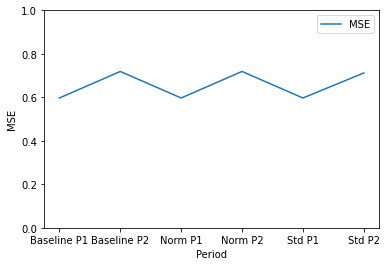

In [6]:
mse = [0.597 , 0.719,0.597, 0.719,0.597, 0.712]
mse_unfiltered = [0.172 , 0.190,0.172, 0.206,0.215, 0.214]


x_labels = ["Baseline P1", "Baseline P2","Norm P1", "Norm P2","Std P1", "Std P2"]

# Set the x-axis and y-axis labels
plt.xlabel("Period")
plt.ylabel("MSE")
plt.ylim(0, 1)

# Plot the MSE values as a line plot
plt.plot(x_labels, mse)

# Add a legend
plt.legend(['MSE'])

# Show the chart
plt.show()
# Create separate lists for data of P1 and P2
mse_p1 = [0.597, 0.597, 0.597]
mse_p2 = [0.719, 0.719, 0.712]
mse_nofilt_p1 = [0.172, 0.190, 0.172]
mse_nofilt_p2 = [0.206, 0.215, 0.214]
x_labels_p1 = ["Baseline Filt P1", "Norm Filt P1", "Std Filt P1"]
x_labels_p2 = ["Baseline Filt P2", "Norm Filt P2", "Std Filt P2"]
x_labels_nofilt_p1 = ["Baseline P1", "Norm P1", "Std P1"]
x_labels_nofilt_p2 = ["Baseline P2", "Norm P2", "Std P2"]

# Set the x-axis and y-axis labels
plt.xlabel("Period")
plt.ylabel("MSE")
plt.ylim(0, 1)

# Plot the MSE values for P1 as a blue line
plt.plot(x_labels_p1, mse_p1, color='blue', linestyle='-', label='MSE Filt P1')

# Plot the MSE values for P2 as a red line
plt.plot(x_labels_p2, mse_p2, color='red', linestyle='-.', label='MSE Filt P2')

# Plot the MSE values for P1 as a blue line
plt.plot(x_labels_nofilt_p1, mse_p1, color='blue', linestyle='-', label='MSE P1')

# Plot the MSE values for P2 as a red line
plt.plot(x_labels_nofilt_p2, mse_p2, color='red', linestyle='-.', label='MSE P2')



# Add a legend
plt.legend()

# Show the chart
plt.show()

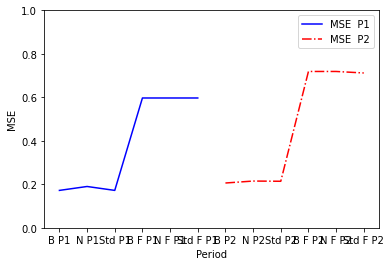

In [11]:
# Create separate lists for data of P1 and P2
mse_p1 = [0.172, 0.190, 0.172, 0.597, 0.597, 0.597]
mse_p2 = [0.206, 0.215, 0.214, 0.719, 0.719, 0.712]
#mse_nofilt_p1 = [0.172, 0.190, 0.172]
#mse_nofilt_p2 = [0.206, 0.215, 0.214]
x_labels_p1 = ["B P1", "N P1", "Std P1","B F P1", "N F P1", "Std F P1"]
x_labels_p2 = ["B P2", "N P2", "Std P2","B F P2", "N F P2", "Std F P2"]
#x_labels_nofilt_p1 = ["Baseline P1", "Norm P1", "Std P1"]
#x_labels_nofilt_p2 = ["Baseline P2", "Norm P2", "Std P2"]

# Set the x-axis and y-axis labels
plt.xlabel("Period")
plt.ylabel("MSE")
plt.ylim(0, 1)

# Plot the MSE values for P1 as a blue line
plt.plot(x_labels_p1, mse_p1, color='blue', linestyle='-', label='MSE  P1')

# Plot the MSE values for P2 as a red line
plt.plot(x_labels_p2, mse_p2, color='red', linestyle='-.', label='MSE  P2')

# Plot the MSE values for P1 as a blue line
#plt.plot(x_labels_nofilt_p1, mse_p1, color='green', linestyle='-', label='MSE P1')

# Plot the MSE values for P2 as a red line
#plt.plot(x_labels_nofilt_p2, mse_p2, color='black', linestyle='-.', label='MSE P2')

# Add a legend
plt.legend()

# Show the chart
plt.show()

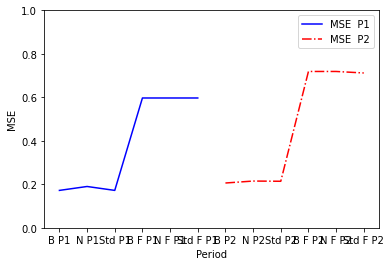

In [12]:
# Create separate lists for data of P1 and P2
mse_p1 = [0.172, 0.190, 0.172, 0.597, 0.597, 0.597]
mse_p2 = [0.206, 0.215, 0.214, 0.719, 0.719, 0.712]

x_labels_p1 = ["B P1", "N P1", "Std P1","B F P1", "N F P1", "Std F P1"]
x_labels_p2 = ["B P2", "N P2", "Std P2","B F P2", "N F P2", "Std F P2"]

# Set the x-axis and y-axis labels
plt.xlabel("Period")
plt.ylabel("MSE")
plt.ylim(0, 1)

# Plot the MSE values for P1 as a blue line
plt.plot(x_labels_p1, mse_p1, color='blue', linestyle='-', label='MSE  P1')

# Plot the MSE values for P2 as a red line
plt.plot(x_labels_p2, mse_p2, color='red', linestyle='-.', label='MSE  P2')

# Add a legend
plt.legend()

# Show the chart
plt.show()

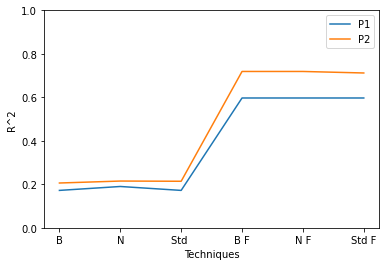

In [18]:
# Create separate lists for data of P1 and P2
mse_p1 = [0.172, 0.190, 0.172, 0.597, 0.597, 0.597]
mse_p2 = [0.206, 0.215, 0.214, 0.719, 0.719, 0.712]

x_labels_p1 = ["B", "N", "Std ","B F", "N F", "Std F"]

# Set the x-axis and y-axis labels
plt.xlabel("Techniques")
plt.ylabel("R^2")
plt.ylim(0, 1)

# Plot the MSE values for P1 and P2
plt.plot(x_labels_p1, mse_p1, label = 'P1')
plt.plot(x_labels_p1, mse_p2, label = 'P2')
plt.legend()
# Show the chart
plt.show()

In [43]:
df1 = df[df['flow']>0]

In [44]:
pd.options.mode.chained_assignment = None 

In [45]:
df2 = df_filtered[df_filtered['flow']>0]

In [46]:
# plot without filtering

array([[<AxesSubplot:title={'center':'flow'}>,
        <AxesSubplot:title={'center':'selfEntropyT'}>,
        <AxesSubplot:title={'center':'selfEntropyS'}>,
        <AxesSubplot:title={'center':'author_followers_source'}>],
       [<AxesSubplot:title={'center':'author_tweets_source'}>,
        <AxesSubplot:title={'center':'author_following_source'}>,
        <AxesSubplot:title={'center':'author_listed_source'}>,
        <AxesSubplot:title={'center':'FF_Ratio_source'}>],
       [<AxesSubplot:title={'center':'FF_ratio2_source'}>,
        <AxesSubplot:title={'center':'TweetsNb_source_users'}>,
        <AxesSubplot:title={'center':'author_followers_target'}>,
        <AxesSubplot:title={'center':'author_tweets_target'}>],
       [<AxesSubplot:title={'center':'author_following_target'}>,
        <AxesSubplot:title={'center':'author_listed_target'}>,
        <AxesSubplot:title={'center':'FF_Ratio_target'}>,
        <AxesSubplot:title={'center':'FF_ratio2_target'}>],
       [<AxesSubplot:titl

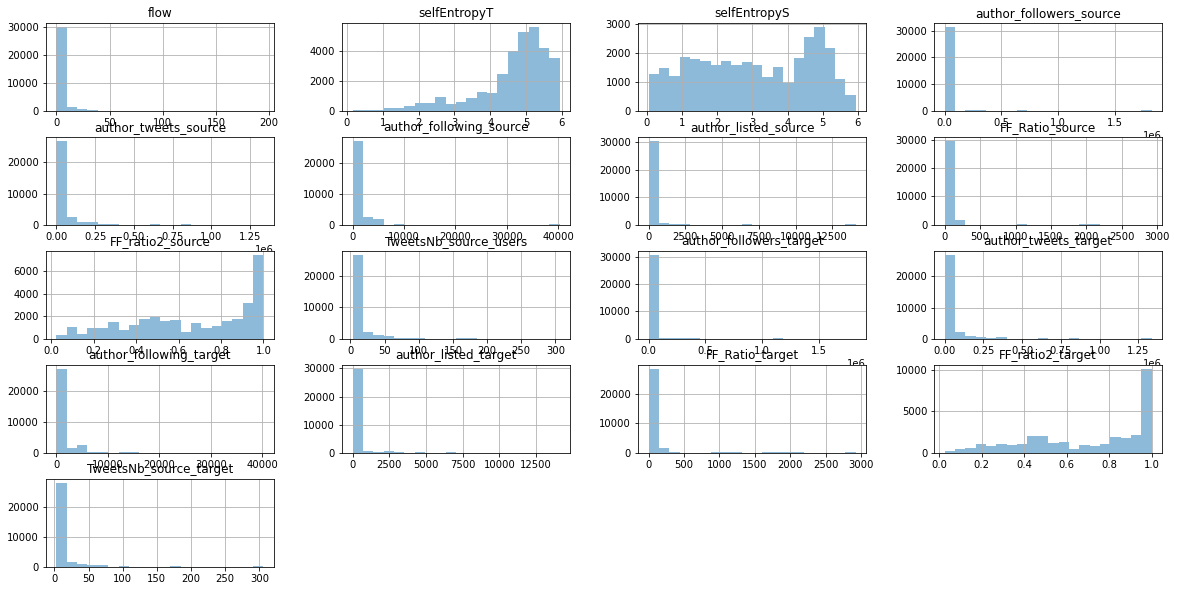

In [47]:
df[df['flow']>0][columns].hist(bins = 20, alpha = 0.5,figsize=(20,10))

In [48]:
# plot with filtering

array([[<AxesSubplot:title={'center':'flow'}>,
        <AxesSubplot:title={'center':'selfEntropyT'}>,
        <AxesSubplot:title={'center':'selfEntropyS'}>,
        <AxesSubplot:title={'center':'author_followers_source'}>],
       [<AxesSubplot:title={'center':'author_tweets_source'}>,
        <AxesSubplot:title={'center':'author_following_source'}>,
        <AxesSubplot:title={'center':'author_listed_source'}>,
        <AxesSubplot:title={'center':'FF_Ratio_source'}>],
       [<AxesSubplot:title={'center':'FF_ratio2_source'}>,
        <AxesSubplot:title={'center':'TweetsNb_source_users'}>,
        <AxesSubplot:title={'center':'author_followers_target'}>,
        <AxesSubplot:title={'center':'author_tweets_target'}>],
       [<AxesSubplot:title={'center':'author_following_target'}>,
        <AxesSubplot:title={'center':'author_listed_target'}>,
        <AxesSubplot:title={'center':'FF_Ratio_target'}>,
        <AxesSubplot:title={'center':'FF_ratio2_target'}>],
       [<AxesSubplot:titl

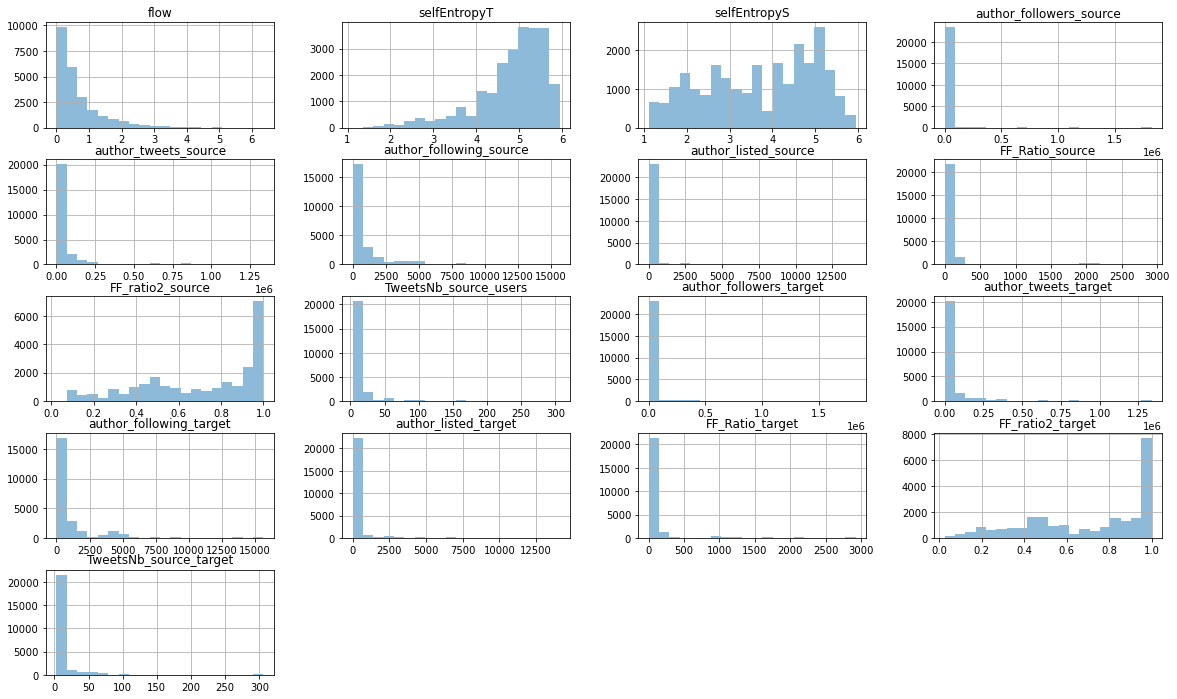

In [49]:
df_filtered[df_filtered['flow']>0][columns].hist(bins = 20, alpha = 0.5,figsize=(20,12))

In [50]:
col = ['selfEntropyS','flow']

array([[<AxesSubplot:title={'center':'selfEntropyS'}>,
        <AxesSubplot:title={'center':'flow'}>]], dtype=object)

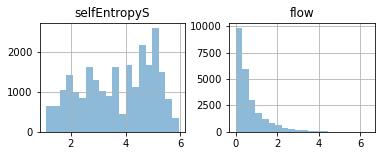

In [51]:
df_filtered[df_filtered['flow']>0][col].hist(bins = 20, alpha = 0.5,figsize=(6,2))

# Calculate the MSE 

MSE Calculation with Train test and all the int columns 

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = df[df['flow']>0][columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df[df['flow']>0][columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')


Mean squared error: 103.56952794076282


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = df_filtered[df_filtered['flow']>0][columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df_filtered[df_filtered['flow']>0][columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')



Mean squared error: 0.20831580582661766


In [151]:
from sklearn.linear_model import LinearRegression

# Select the columns to use as the independent variables
X = df_filtered[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df_filtered[columns]['flow']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a table with the coefficients and features
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

print(coefficients)

                    feature   coefficient
0              selfEntropyT -4.971159e-01
1              selfEntropyS  4.971159e-01
2   author_followers_source -3.905301e-07
3      author_tweets_source -1.176036e-07
4   author_following_source -6.176403e-06
5      author_listed_source  3.811179e-05
6           FF_Ratio_source  8.295182e-05
7          FF_ratio2_source  1.727207e-02
8     TweetsNb_source_users  1.848008e-03
9   author_followers_target  3.905301e-07
10     author_tweets_target  1.176036e-07
11  author_following_target  6.176403e-06
12     author_listed_target -3.811179e-05
13          FF_Ratio_target -8.295182e-05
14         FF_ratio2_target -1.727207e-02
15   TweetsNb_source_target -1.848008e-03


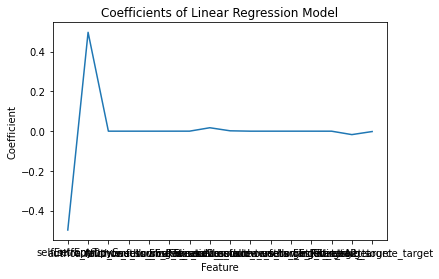

In [152]:
import matplotlib.pyplot as plt

# Assume that the coefficients are stored in a list called "coefficients"
# and the corresponding feature names are stored in a list called "features"

# Create the line plot
plt.plot(X.columns, model.coef_)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Linear Regression Model')

plt.figure()

# Show plot
plt.show()

# Normalization

In [553]:
# without filter

In [54]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the data
scaler.fit(df1[columns])

# transform the data using the scaler
df1[columns] = scaler.transform(df1[columns])

In [55]:
# Select the columns to use as the independent variables
X = df1[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.002604360198865131


In [60]:
from sklearn.linear_model import LinearRegression

# Select the columns to use as the independent variables
X = df1[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns]['flow']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a table with the coefficients and features
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

print(coefficients)

                    feature  coefficient
0              selfEntropyT     0.003347
1              selfEntropyS    -0.081018
2   author_followers_source    -0.031237
3      author_tweets_source    -0.017779
4   author_following_source    -0.021444
5      author_listed_source     0.021058
6           FF_Ratio_source     0.017872
7          FF_ratio2_source    -0.028514
8     TweetsNb_source_users     0.028812
9   author_followers_target     0.003667
10     author_tweets_target    -0.005800
11  author_following_target     0.008419
12     author_listed_target    -0.013880
13          FF_Ratio_target     0.004435
14         FF_ratio2_target     0.000374
15   TweetsNb_source_target     0.023541


In [61]:
coefficients

,feature,coefficient
0,selfEntropyT,0.003347
1,selfEntropyS,-0.081018
2,author_followers_source,-0.031237
3,author_tweets_source,-0.017779
4,author_following_source,-0.021444
5,author_listed_source,0.021058
6,FF_Ratio_source,0.017872
7,FF_ratio2_source,-0.028514
8,TweetsNb_source_users,0.028812
9,author_followers_target,0.003667


In [62]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the data
scaler.fit(df2[columns])

# transform the data using the scaler
df2[columns] = scaler.transform(df2[columns])

In [63]:
# Select the columns to use as the independent variables
X = df2[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.0056286138708896375


In [64]:
from sklearn.linear_model import LinearRegression

# Select the columns to use as the independent variables
X = df2[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns]['flow']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a table with the coefficients and features
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

print(coefficients)

                    feature  coefficient
0              selfEntropyT     0.153411
1              selfEntropyS    -0.357675
2   author_followers_source     0.083715
3      author_tweets_source     0.022240
4   author_following_source     0.041137
5      author_listed_source    -0.089864
6           FF_Ratio_source    -0.022656
7          FF_ratio2_source    -0.003799
8     TweetsNb_source_users    -0.036168
9   author_followers_target     0.009937
10     author_tweets_target    -0.034748
11  author_following_target     0.005795
12     author_listed_target    -0.097400
13          FF_Ratio_target     0.037093
14         FF_ratio2_target     0.004861
15   TweetsNb_source_target     0.175542


In [65]:
coefficients

,feature,coefficient
0,selfEntropyT,0.153411
1,selfEntropyS,-0.357675
2,author_followers_source,0.083715
3,author_tweets_source,0.022240
4,author_following_source,0.041137
5,author_listed_source,-0.089864
6,FF_Ratio_source,-0.022656
7,FF_ratio2_source,-0.003799
8,TweetsNb_source_users,-0.036168
9,author_followers_target,0.009937


In [771]:
coefficients = coefficients[5:]

In [756]:
coefficients

,feature,coefficient
5,author_listed_source,-0.097400
6,FF_Ratio_source,0.037093
7,FF_ratio2_source,0.004861
8,TweetsNb_source_users,0.175542
9,author_followers_target,0.083715
10,author_tweets_target,0.022240
11,author_following_target,0.041137
12,author_listed_target,-0.089864
13,FF_Ratio_target,-0.022656
14,FF_ratio2_target,-0.003799


In [769]:
ref_coeff =coefficients

In [733]:
#coefficients = coefficients.set_index('feature')

KeyError: "None of ['feature'] are in the columns"

In [772]:
coefficients = coefficients.rename(columns={'coefficient': 'coeff1' })

In [773]:
ref_coeff = ref_coeff.rename(columns={'coefficient': 'coeff2' })

In [730]:
#ref_coeff = ref_coeff.set_index('feature')

In [774]:
tfx = ref_coeff.merge(coefficients)

In [778]:
tfx

,feature,coeff2,coeff1
0,author_listed_source,-0.049747,-0.097400
1,FF_Ratio_source,0.021562,0.037093
2,FF_ratio2_source,0.004922,0.004861
3,TweetsNb_source_users,0.087426,0.175542
4,author_followers_target,0.405898,0.083715
5,author_tweets_target,-0.116217,0.022240
6,author_following_target,-0.084888,0.041137
7,author_listed_target,-0.302930,-0.089864
8,FF_Ratio_target,-0.127551,-0.022656
9,FF_ratio2_target,-0.002114,-0.003799


In [784]:
tfx['abs_val_diff'] = abs(tfx['coeff2'] - tfx['coeff1'])

In [785]:
tfx

,feature,coeff2,coeff1,abs_val_diff
0,author_listed_source,-0.049747,-0.097400,0.047653
1,FF_Ratio_source,0.021562,0.037093,0.015531
2,FF_ratio2_source,0.004922,0.004861,0.000061
3,TweetsNb_source_users,0.087426,0.175542,0.088116
4,author_followers_target,0.405898,0.083715,0.322184
5,author_tweets_target,-0.116217,0.022240,0.138457
6,author_following_target,-0.084888,0.041137,0.126024
7,author_listed_target,-0.302930,-0.089864,0.213067
8,FF_Ratio_target,-0.127551,-0.022656,0.104896
9,FF_ratio2_target,-0.002114,-0.003799,0.001686


## Visualize Norm

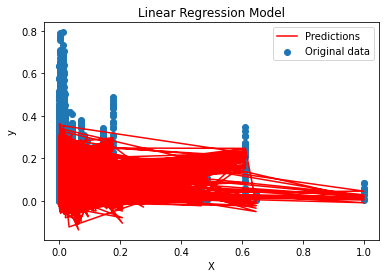

In [591]:
import matplotlib.pyplot as plt
# Visualize the model
plt.scatter(X_test['author_tweets_target'], y_test, label='Original data')
plt.plot(X_test['author_tweets_target'], predictions, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

# Standardizer

In [592]:
dfs = df[df['flow']>0]

In [593]:
dfs = dfs[columns]

In [594]:
for col in columns:
    if col != 'flow' :   
        dfs[col] = (dfs[col]- dfs[col].mean())/dfs[col].std()

In [595]:
df_filtered_std = df_filtered[df_filtered['flow']>0]

In [596]:
df_filtered_std = df_filtered_std[columns]

In [597]:
for col in columns:
    if col != 'flow' :   
        df_filtered_std[col] = (df_filtered_std[col]- df_filtered_std[col].mean())/df[col].std()

In [598]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = dfs.drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = dfs['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_std = LinearRegression()

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')



Mean squared error: 120.69872405891593


In [601]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = df_filtered_std.drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = df_filtered_std['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_std = LinearRegression()

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')




Mean squared error: 0.23243330180031543


In [637]:
from sklearn.linear_model import LinearRegression

# Select the columns to use as the independent variables
X = df_filtered_std[columns_ref].drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = df_filtered_std[columns_ref]['flow']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a table with the coefficients and features
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

print(coefficients)

                    feature  coefficient
0      author_listed_source    -0.025943
1           FF_Ratio_source     0.017689
2          FF_ratio2_source     0.009214
3     TweetsNb_source_users     0.051186
4   author_followers_target     0.208915
5      author_tweets_target    -0.074612
6   author_following_target    -0.108897
7      author_listed_target    -0.157978
8           FF_Ratio_target    -0.104636
9          FF_ratio2_target    -0.003956
10   TweetsNb_source_target     0.230814


# Feature Selection

# F regression

## baseline filtered

In [623]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df_filtered[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df_filtered['flow']

# Calculate the F-value and p-value for each feature
f_values, p_values = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values)
print('p_values_norm : ',p_values)

f_values_norm :  [2.65119792e+04 2.65119792e+04 2.79141704e+01 6.09842955e+01
 8.72323344e+01 1.13059540e-02 1.09416958e+02 1.71041964e-02
 1.58210787e+02 2.79141704e+01 6.09842955e+01 8.72323344e+01
 1.13059540e-02 1.09416958e+02 1.71041964e-02 1.58210787e+02]
p_values_norm :  [0.00000000e+00 0.00000000e+00 1.27362599e-07 5.86783138e-15
 1.00428644e-20 9.15321397e-01 1.39993195e-25 8.95947503e-01
 3.17003396e-36 1.27362599e-07 5.86783138e-15 1.00428644e-20
 9.15321397e-01 1.39993195e-25 8.95947503e-01 3.17003396e-36]


# 1 feature for p value 

In [649]:
columns

['flow',
 'selfEntropyT',
 'selfEntropyS',
 'author_followers_source',
 'author_tweets_source',
 'author_following_source',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source_users',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_source_target']

In [650]:
columns_ref

['flow',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source_users',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_source_target']

In [666]:
col = ['author_followers_target','author_followers_source','flow']

In [667]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df_filtered[col].drop('flow',axis=1)

# Select the column to use as the dependent variable
y = df_filtered['flow']

# Calculate the F-value and p-value for each feature
f_values, p_values = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values)
print('p_values_norm : ',p_values)

f_values_norm :  [27.91417042 27.91417042]
p_values_norm :  [1.27362599e-07 1.27362599e-07]


# std

In [603]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = dfs.drop('flow', axis=1)

# Select the column to use as the dependent variable
y = dfs['flow']

# Calculate the F-value and p-value for each feature
f_values_std, p_values_std = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values_std)
print('p_values_norm : ',p_values_std)

f_values_norm :  [6.51811610e+03 7.14812817e+02 3.82808068e-01 4.82738321e-04
 1.41142055e+00 1.24078973e-01 2.14861694e-01 3.64572778e-02
 2.68318177e+01 3.79928227e+01 8.75756109e+01 5.20576678e+01
 3.27901799e+01 1.07740978e+02 1.13225073e+03 2.66796332e+02]
p_values_norm :  [0.00000000e+000 9.13842845e-156 5.36108611e-001 9.82470980e-001
 2.34829499e-001 7.24654252e-001 6.42986394e-001 8.48575461e-001
 2.23290785e-007 7.18487115e-010 8.62144004e-021 5.50858426e-013
 1.03576242e-008 3.35749820e-025 5.62411548e-244 9.86639916e-060]


In [604]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df_filtered_std.drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df_filtered_std['flow']

# Calculate the F-value and p-value for each feature
f_values_std, p_values_std = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values_std)
print('p_values_norm : ',p_values_std)

f_values_norm :  [2.88411739e+04 2.52265855e+01 1.41812950e-02 1.16621377e+01
 8.97457170e-01 4.54520527e+00 7.55400229e+00 9.17387793e+00
 7.71981908e+01 1.82819463e+00 6.56578138e+00 7.11143254e+00
 1.23499361e-01 6.84274743e+01 5.50916594e-01 9.00866152e+02]
p_values_norm :  [0.00000000e+000 5.13353719e-007 9.05208806e-001 6.38891992e-004
 3.43473871e-001 3.30210607e-002 5.99211101e-003 2.45751426e-003
 1.64647548e-018 1.76353515e-001 1.04017778e-002 7.66445803e-003
 7.25272757e-001 1.38305253e-016 4.57950588e-001 2.23450578e-194]


## norm

In [605]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df1[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns]['flow']

# Calculate the F-value and p-value for each feature
f_values_norm, p_values_norm = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values_norm)
print('p_values_norm : ',p_values_norm)

f_values_norm :  [6.51811610e+03 7.14812817e+02 3.82808068e-01 4.82738321e-04
 1.41142055e+00 1.24078973e-01 2.14861694e-01 3.64572778e-02
 2.68318177e+01 3.79928227e+01 8.75756109e+01 5.20576678e+01
 3.27901799e+01 1.07740978e+02 1.13225073e+03 2.66796332e+02]
p_values_norm :  [0.00000000e+000 9.13842845e-156 5.36108611e-001 9.82470980e-001
 2.34829499e-001 7.24654252e-001 6.42986394e-001 8.48575461e-001
 2.23290785e-007 7.18487115e-010 8.62144004e-021 5.50858426e-013
 1.03576242e-008 3.35749820e-025 5.62411548e-244 9.86639916e-060]


In [633]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df2[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns]['flow']

# Calculate the F-value and p-value for each feature
f_values_norm, p_values_norm = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values_norm)
print('p_values_norm : ',p_values_norm)

f_values_norm :  [2.88411739e+04 2.52265855e+01 1.41812950e-02 1.16621377e+01
 8.97457170e-01 4.54520527e+00 7.55400229e+00 9.17387793e+00
 7.71981908e+01 1.82819463e+00 6.56578138e+00 7.11143254e+00
 1.23499361e-01 6.84274743e+01 5.50916594e-01 9.00866152e+02]
p_values_norm :  [0.00000000e+000 5.13353719e-007 9.05208806e-001 6.38891992e-004
 3.43473871e-001 3.30210607e-002 5.99211101e-003 2.45751426e-003
 1.64647548e-018 1.76353515e-001 1.04017778e-002 7.66445803e-003
 7.25272757e-001 1.38305253e-016 4.57950588e-001 2.23450578e-194]


# Lasso

## std

In [607]:
from sklearn.linear_model import Lasso

# Select the columns to use as the independent variables
X = dfs.drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = dfs['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Lasso model
model_std = Lasso(alpha=0.1)

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 101.20654476654548


In [608]:
from sklearn.linear_model import Lasso

# Select the columns to use as the independent variables
X = df_filtered_std.drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = df_filtered_std['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Lasso model
model_std = Lasso(alpha=0.1)

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.2738595659642277


## norm

In [609]:
from sklearn.linear_model import Lasso

# Select the columns to use as the independent variables
X = df1[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Lasso model
model_norm = Lasso(alpha=0.1)

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.0030714865514473583


In [610]:
from sklearn.linear_model import Lasso

# Select the columns to use as the independent variables
X = df2[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Lasso model
model_norm = Lasso(alpha=0.1)

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.013646315237668582


# RFE

## std

In [611]:
from sklearn.feature_selection import RFE
# Use recursive feature elimination to select the best features
rfe_std = RFE(model_std, n_features_to_select=10)
rfe_std = rfe_std.fit(X, y)

# Print the selected features
print(rfe_std.support_)

# Print the ranking of the features
print(rfe_std.ranking_)

[False False False False False False  True  True  True  True  True  True
  True  True  True  True]
[7 6 5 4 3 2 1 1 1 1 1 1 1 1 1 1]


## norm

In [612]:
from sklearn.feature_selection import RFE
# Use recursive feature elimination to select the best features
rfe_norm = RFE(model_norm, n_features_to_select=10)
rfe_norm = rfe_norm.fit(X, y)

# Print the selected features
print(rfe_norm.support_)

# Print the ranking of the features
print(rfe_norm.ranking_)

[False False False False False False  True  True  True  True  True  True
  True  True  True  True]
[7 6 5 4 3 2 1 1 1 1 1 1 1 1 1 1]


meme resultats pr std et norm de rfe

# utiliser seulement les ref pour la mse 

In [613]:
columns

['flow',
 'selfEntropyT',
 'selfEntropyS',
 'author_followers_source',
 'author_tweets_source',
 'author_following_source',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source_users',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_source_target']

In [231]:
columns_ref = ['flow',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source_users',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_source_target']

on tej 'author_followers_source','author_tweets_source','author_following_source' due a rfe

In [507]:
# Select the columns to use as the independent variables
X = df1[columns_ref].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns_ref]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.0009444702353744201


In [508]:
# Select the columns to use as the independent variables
X = df2[columns_ref].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns_ref]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.012257109055598386


In [509]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = dfs[columns_ref].drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = dfs[columns_ref]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_std = LinearRegression()

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')




Mean squared error: 0.0009183757908585509


In [510]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = df_filtered_std[columns_ref].drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = df_filtered_std[columns_ref]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_std = LinearRegression()

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')





Mean squared error: 0.5141578073448119


# Choosing only the Significant p values 

In [146]:
p_val_sign = ['flow','selfEntropyT','selfEntropyS','author_followers_source','author_tweets_source',
              'author_following_source','FF_Ratio_source','TweetsNb_source_users','author_followers_target',
              'author_tweets_target','author_following_target','FF_Ratio_target','TweetsNb_source_target']

In [147]:
# normaliser + filtered + only significant p values 

In [148]:
# Select the columns to use as the independent variables
X = df2[p_val_sign].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[p_val_sign]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.005441812484883648
